In [ ]:
#pip install xlrd

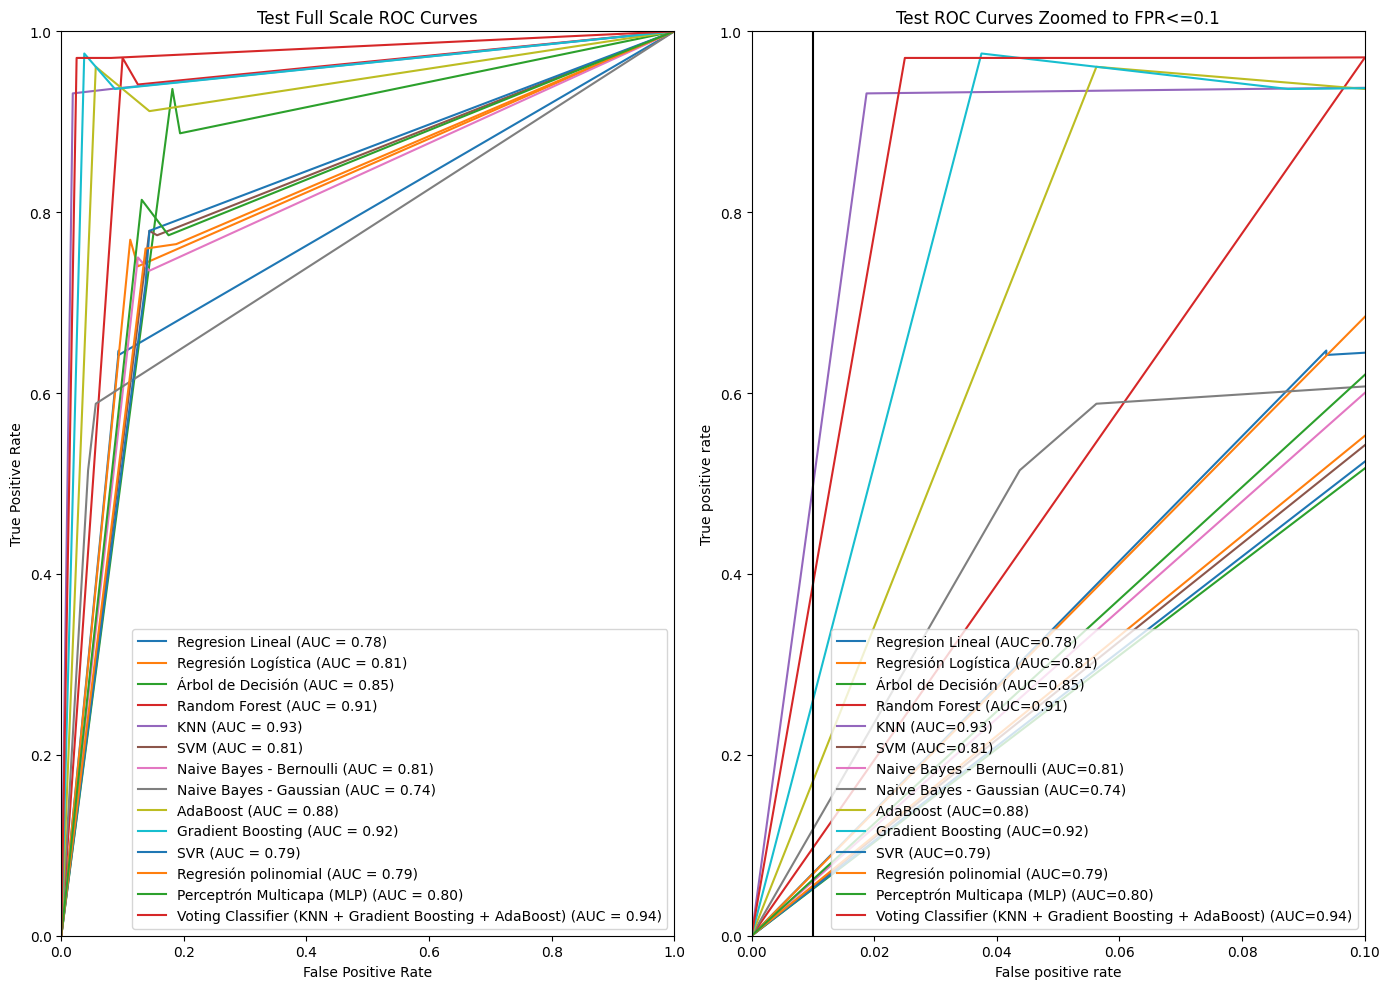

In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


# Cargar el archivo de Excel
excel_file_path = 'model_results.xls'
df_models_results = pd.read_excel(excel_file_path, sheet_name='Test Results Isolated')

# Lista de los modelos
models = df_models_results['Model'].unique()

# Extraer los valores necesarios del dataframe
roc_data = {}
for model in models:
    model_data = df_models_results[df_models_results['Model'] == model]
    fpr = model_data['FP'].values / (model_data['FP'].values + model_data['TN'].values)
    tpr = model_data['TP'].values / (model_data['TP'].values + model_data['FN'].values)
    roc_auc = model_data['AUC-ROC'].values[0]  # Asumiendo que AUC-ROC es constante para cada modelo
    
    # Agregar los puntos (0,0) y (1,1)
    fpr = np.insert(fpr, 0, 0)
    tpr = np.insert(tpr, 0, 0)
    fpr = np.append(fpr, 1)
    tpr = np.append(tpr, 1)
    
    # Ordenar los puntos por FPR
    sorted_indices = np.argsort(fpr)
    fpr = fpr[sorted_indices]
    tpr = tpr[sorted_indices]
    
    roc_data[model] = (fpr, tpr, roc_auc)



# Generar las curvas ROC
plt.figure(figsize=(14, 10))

# Full Scale ROC Curves
plt.subplot(1, 2, 1)
for model, (fpr, tpr, roc_auc) in roc_data.items():
    plt.plot(fpr, tpr, label=f'{model} (AUC = {roc_auc:.2f})')
plt.plot([0, 0], [1, 1], 'k--', lw=1)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Test Full Scale ROC Curves')
plt.legend(loc=4)

# ROC Curves Zoomed to FPR<=0.1
plt.subplot(1, 2, 2)
for model, (fpr, tpr, roc_auc) in roc_data.items():
    plt.plot(fpr, tpr, label=f'{model} (AUC={roc_auc:.2f})')
plt.plot([0, 0], [1, 1], 'k--', lw=1)
plt.axvline(x=0.01, color='black', linestyle='-')
plt.xlim([0.0, 0.1])
plt.ylim([0.0, 1.0])
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('Test ROC Curves Zoomed to FPR<=0.1')
plt.legend(loc=4)

plt.tight_layout()
plt.show()
